# **INTRODUCTION**

---



***IMPORT LIBRARIES***

---



In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,recall_score,f1_score,precision_score
from sklearn.metrics import confusion_matrix, accuracy_score
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, label_binarize

***DATA PREPROCESSING***

---



In [4]:
data = pd.read_csv('bank.csv')

In [5]:
data.shape



(11162, 17)

In [6]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [7]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


***DETAILS ABOUT DATA***

---



In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


 **HANDLING MISSING VALUES**

---



In [10]:
data.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

***DATA VISUALIZATION & TRANSFORMATION***

---



<Axes: xlabel='count', ylabel='job'>

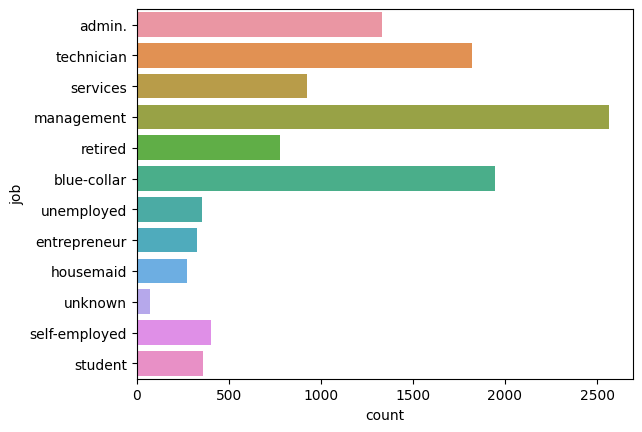

In [11]:
sns.countplot(y='job',data=data)

In [12]:
#AGE DISTRIBUTION
Age=data['age'].value_counts().nlargest(10)
fig = px.bar(data, x=Age.index,y=Age, title='Age_group')
fig.show()

In [13]:
m=data['marital'].value_counts()

In [14]:
fig = px.pie(data,values=m,names=m.index,title='marital_status')
fig.show()
m=data['marital'].value_counts()
m

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [15]:
e=data['education'].value_counts()

In [16]:
fig = px.bar(data,y=e,x=e.index,title='Education_status')
fig.show()
e

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

***APPLY DECISION TREE MODEL***

---



In [17]:
predictors = data.iloc[:,0:16]
predictors = predictors.drop(['pdays'],axis=1)
y = data.iloc[:,-1]
X = pd.get_dummies(predictors)

In [18]:
# spliting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
tree = DecisionTreeClassifier(criterion="entropy", max_depth=8, random_state=0)

model = tree.fit(X_train,y_train)
y_pred = model.predict(X_test)

y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])

In [19]:
# Calculating the accuracy
print("Precision:",round(precision_score(y_test,y_pred),2))
print("Recall:",round(recall_score(y_test,y_pred),2))
print("Accuracy for Decision Tree model is:",round(accuracy_score(y_test, y_pred)*100,2),"%")

Precision: 0.77
Recall: 0.84
Accuracy for Decision Tree model is: 81.07 %
